In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("bank-full.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
mis_value=data.isnull().values.any()
if mis_value==False:
    print("There is no missing Value.")
else:
    print("Missing value is there. please check further.")

There is no missing Value.


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
#finding duplicate value
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [12]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [13]:
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

When, Skewness=0 ==>normal distribution

  Skewness>0 ==>positively skewed distribution/Right skewed Distribution. (has a long right tail).

  Skewness<0==>negatively skewed distribution/Left skewed Distribution. (has a long left tail).
We have al positive values.

In [14]:
#checking the presence of outliers:
outliers=[]
def find_outliers(data):
    sorted_data=sorted(data)
    q1,q2,q3=np.percentile(sorted_data,[25,50,75])
    iqr=q3-q1
    min=q1-1.5*iqr
    max=q3+1.5*iqr
    for i in data:
        if i<min or i>max:
            outliers.append(i)
    print("The number of outliers present are:",len(outliers))
    print("Above",max,"are outliers")
    print("value of q1:",q1)
    print("value of q2:",q2)
    print("value of q3:",q3)
age=data["age"]
find_outliers(age)


The number of outliers present are: 487
Above 70.5 are outliers
value of q1: 33.0
value of q2: 39.0
value of q3: 48.0


Here we can see the percentage of the outliers is less, so we can fit the model with and without them.

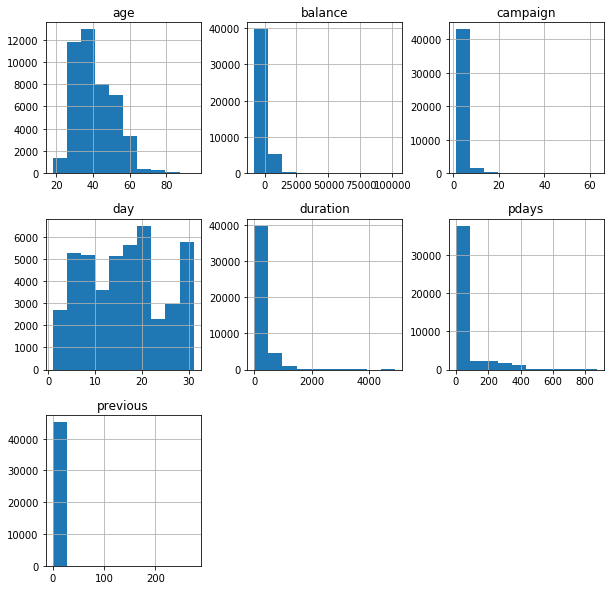

In [15]:
data.hist(figsize=(10,10))
plt.show()

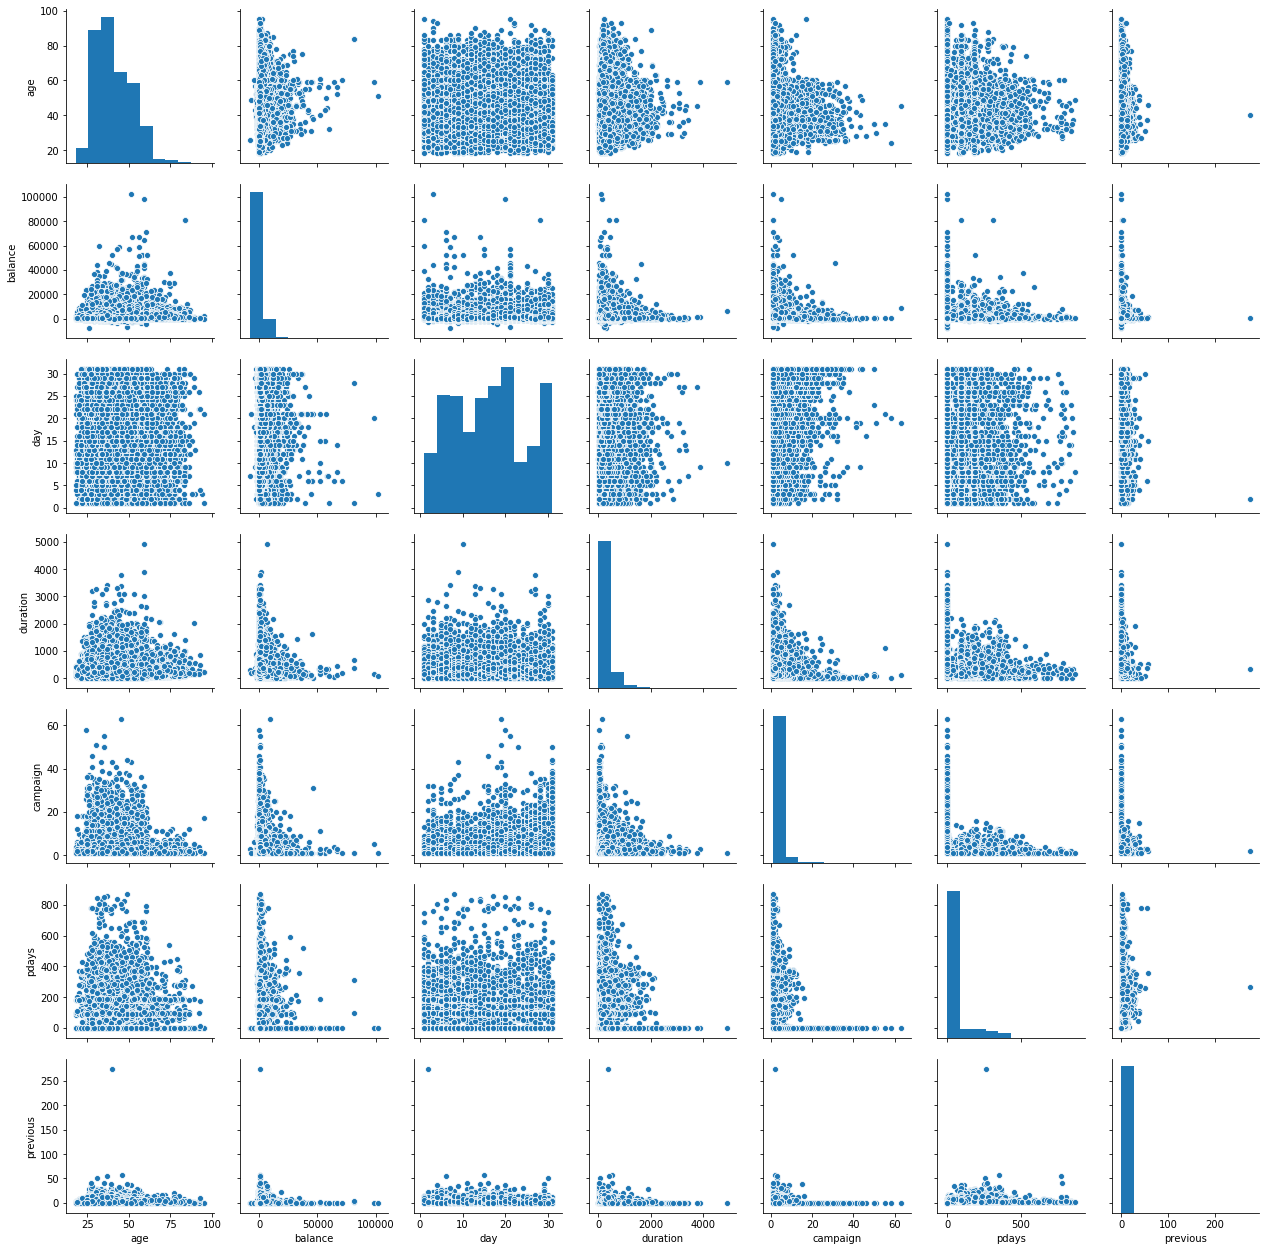

In [16]:
sns.pairplot(data)

Text(0.5, 1.0, 'Job Distribution')

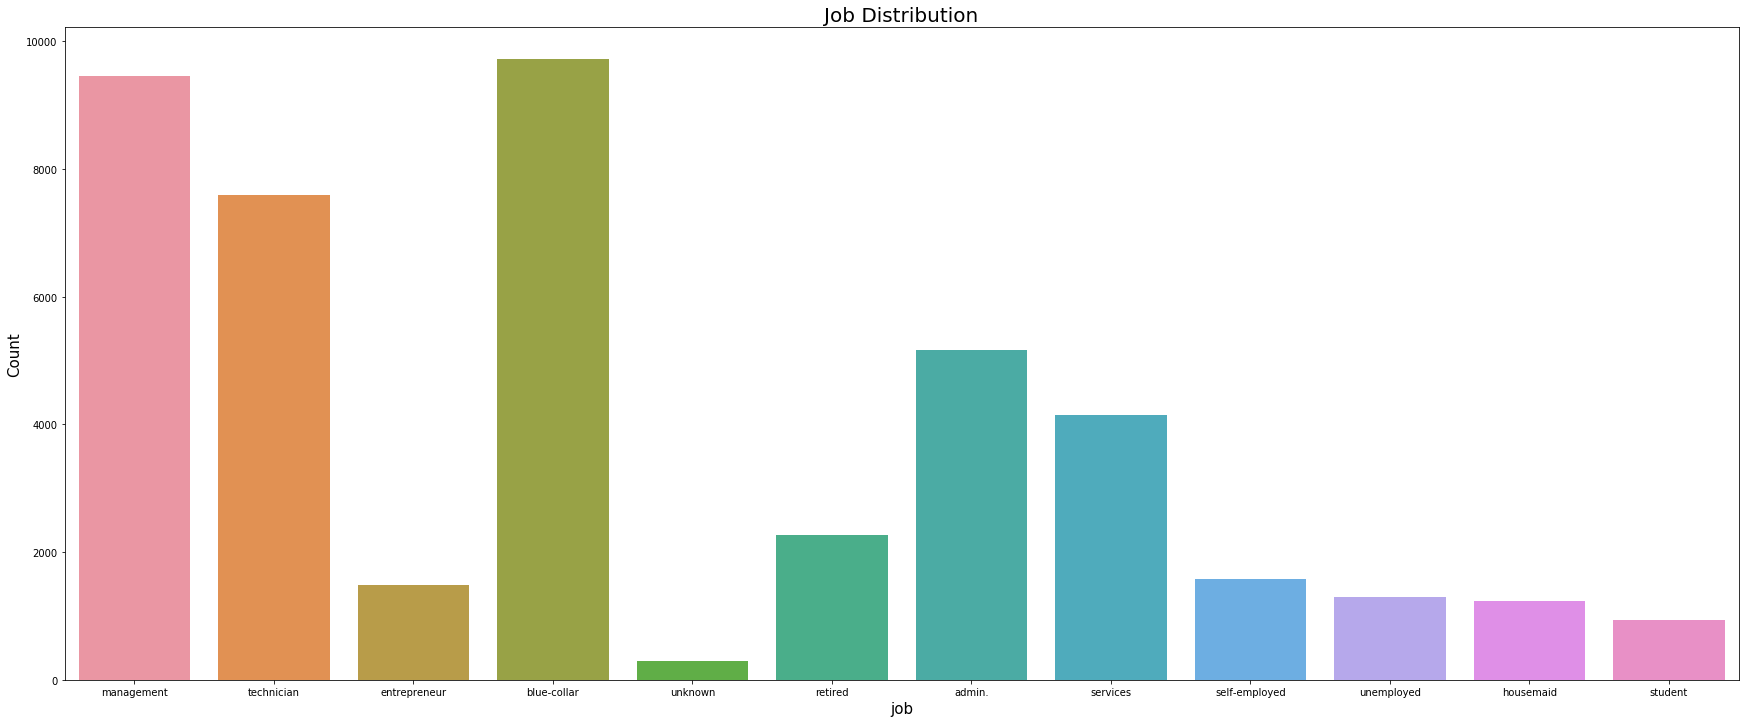

In [17]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data= data)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

The count of 'Blue-collar' is higher than the other .Also the count for 'Management' is noticeable.

Text(0.5, 1.0, 'Marital Distribution')

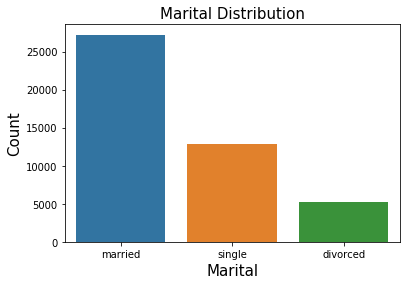

In [18]:
sns.countplot(x = 'marital',data = data)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

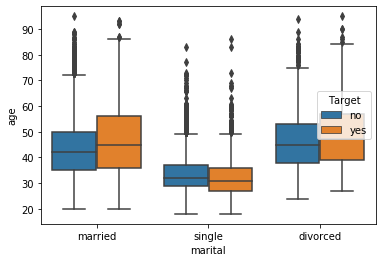

In [19]:
sns.boxplot(x='marital',y='age',hue='Target',data=data)

Here we can see the Mareied people are more subscribing a term deposit.

Text(0.5, 1.0, 'Education Distribution')

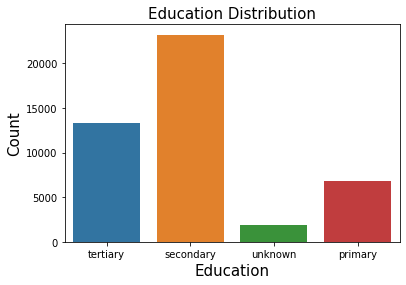

In [20]:
sns.countplot(x = 'education',data = data)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

The clients having secondary education are more .And the clients having unknown eduction are less .

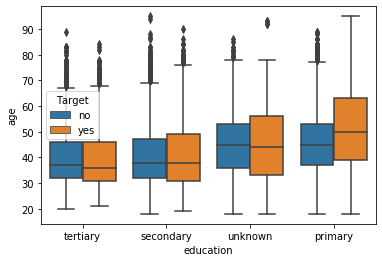

In [21]:
sns.boxplot(x='education',y='age',hue='Target',data=data)

There are outliers present in each education criteria . But the clients having primary education are more who have subscribed a term deposit.

Text(0.5, 1.0, 'Default Distribution')

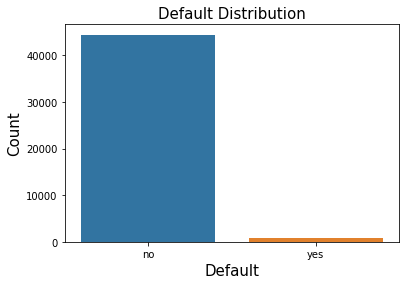

In [22]:
sns.countplot(x = 'default',data = data)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

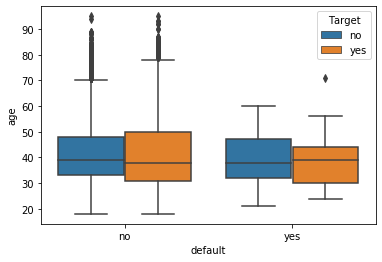

In [23]:
sns.boxplot(x='default',y='age',hue='Target',data=data)

The clients having bydefault credit are less than those who don't have bydefault credit.

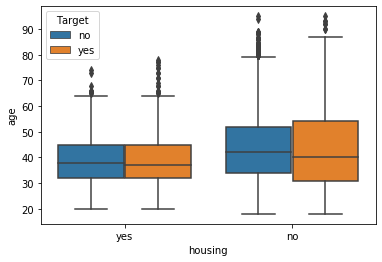

In [24]:
sns.boxplot(x='housing',y='age',hue='Target',data=data)

The clients who don't have taken housing loan have subscribed a term deposite.

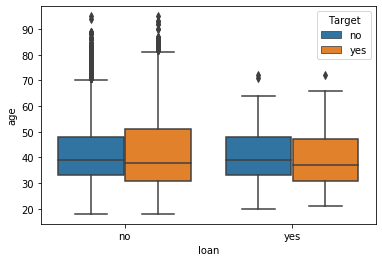

In [25]:
sns.boxplot(x='loan',y='age',hue='Target',data=data)

The clients who don't have taken loan have subscribed a term deposite.

In [26]:
data["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

The count of a clients who can be contacted by Cellular is high that the others.

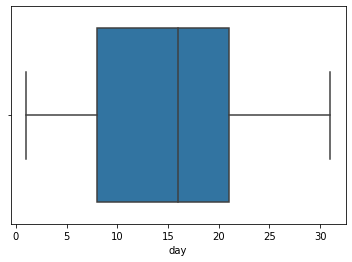

In [27]:
sns.boxplot(x=data["day"])

Most of the contacts are done in 2nd & 3rd week of the month and also there is no outlier present.

In [28]:
data[(data['duration'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


The call duration is iqual to 0, then it is obvious that these person didn't subscribed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094337FE3C8>,
      dtype=object)

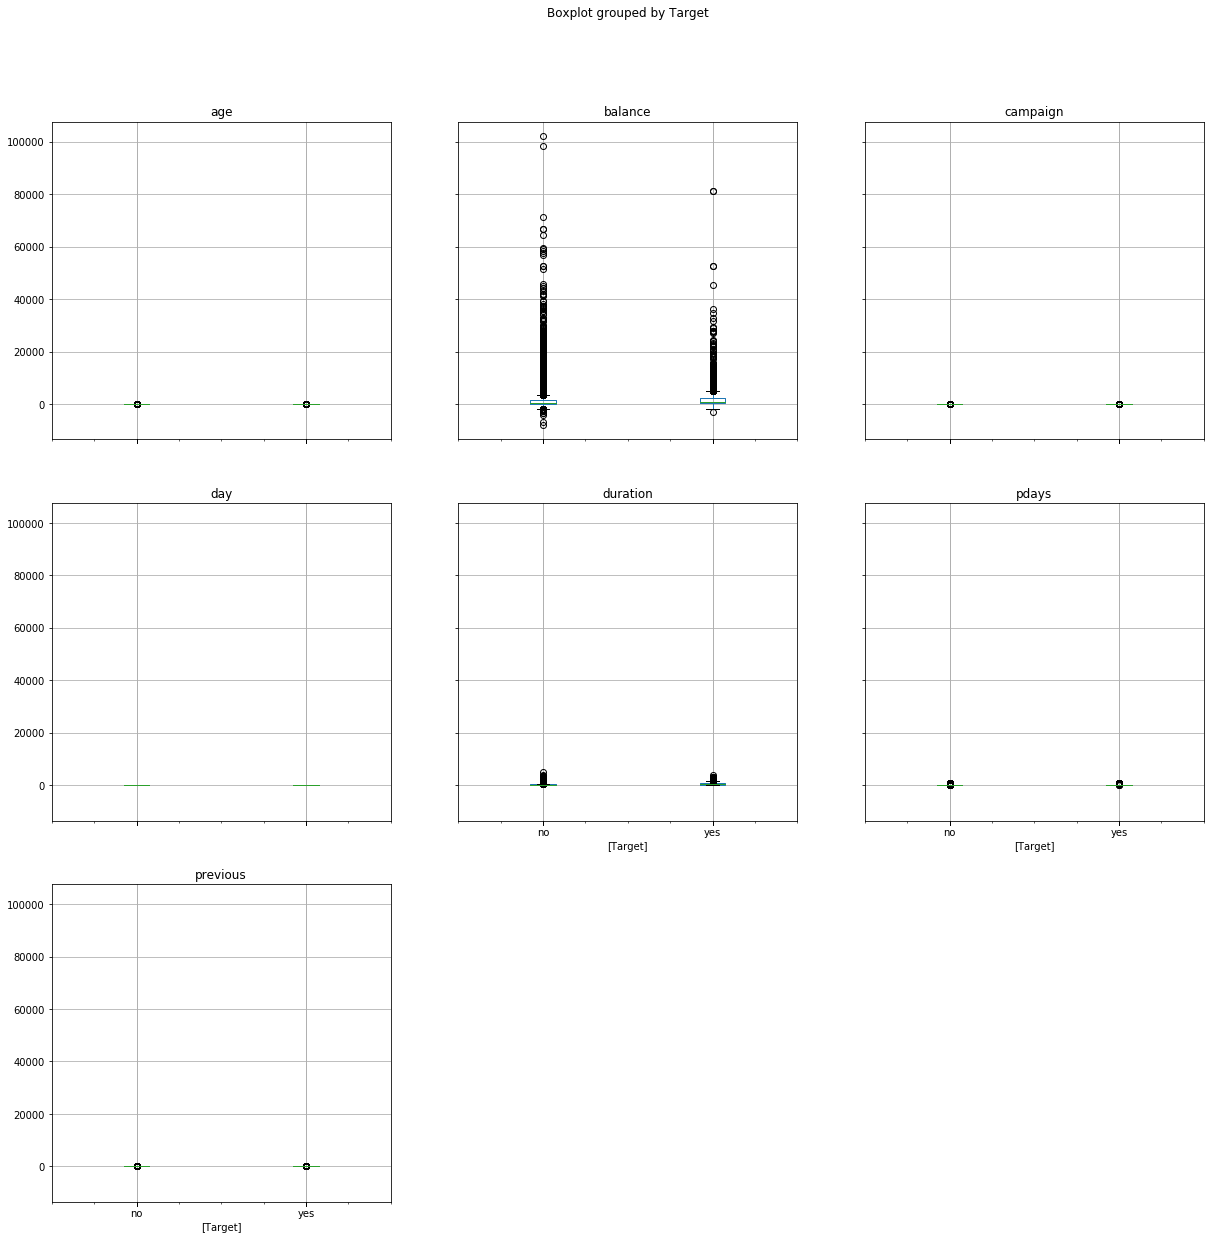

In [29]:
data.boxplot(by = 'Target',figsize=(20,20))

Text(0.5, 1.0, 'Target distribution')

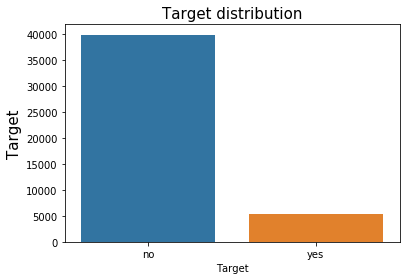

In [30]:
sns.countplot(x = 'Target', data = data)
plt.ylabel("Target", fontsize=15)
plt.title('Target distribution', fontsize=15)

In [31]:
cor=data.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['job']) 
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education']) 
data['default'] = le.fit_transform(data['default']) 
data['housing'] = le.fit_transform(data['housing']) 
data['loan'] = le.fit_transform(data['loan']) 
data['contact'] = le.fit_transform(data['contact']) 
data['month'] = le.fit_transform(data['month'])

In [33]:
age=data["age"]
find_outliers(age)

The number of outliers present are: 974
Above 70.5 are outliers
value of q1: 33.0
value of q2: 39.0
value of q3: 48.0


In [34]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 33, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 33) & (dataframe['age'] <= 48), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 48) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 96), 'age'] = 4      
    return dataframe
age(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,1,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,1,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,unknown,yes
45207,4,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,unknown,yes
45208,4,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,success,yes
45209,3,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,unknown,no


In [35]:
duration=data["duration"]
find_outliers(duration)

The number of outliers present are: 4209
Above 643.0 are outliers
value of q1: 103.0
value of q2: 180.0
value of q3: 319.0


In [36]:
def duration(dataframe):
    dataframe.loc[dataframe['duration'] <= 103, 'duration'] = 1
    dataframe.loc[(dataframe['duration'] > 103) & (dataframe['duration'] <= 180)  , 'duration'] = 2
    dataframe.loc[(dataframe['duration'] > 180) & (dataframe['duration'] <= 319)  , 'duration'] = 3
    dataframe.loc[(dataframe['duration'] > 319) & (dataframe['duration'] <= 643), 'duration'] = 4
    dataframe.loc[dataframe['duration']  > 643, 'duration'] = 5
    return dataframe
duration(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,1,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,1,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,825,0,0,0,17,9,5,3,-1,0,unknown,yes
45207,4,5,0,0,0,1729,0,0,0,17,9,4,2,-1,0,unknown,yes
45208,4,5,1,1,0,5715,0,0,0,17,9,5,5,184,3,success,yes
45209,3,1,1,1,0,668,0,0,1,17,9,4,4,-1,0,unknown,no


In [37]:
pdays=data["pdays"]
find_outliers(pdays)

The number of outliers present are: 12466
Above -1.0 are outliers
value of q1: -1.0
value of q2: -1.0
value of q3: -1.0


In [38]:
data.loc[(data['pdays'] == 999), 'pdays'] = 1
data.loc[(data['pdays'] > 0) & (data['pdays'] <= 10), 'pdays'] = 2
data.loc[(data['pdays'] > 10) & (data['pdays'] <= 20), 'pdays'] = 3
data.loc[(data['pdays'] > 20) & (data['pdays'] < 999), 'pdays'] = 4 
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,unknown,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,unknown,no
2,1,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,unknown,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,unknown,no
4,1,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,unknown,no


In [39]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [40]:
data['poutcome'].replace(['unknown', 'failure','other', 'success'], [1,2,3,4], inplace  = True)

In [41]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,2143,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,29,1,0,2,5,8,2,1,-1,0,1,no
2,1,2,1,1,0,2,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1506,1,0,2,5,8,1,1,-1,0,1,no
4,1,11,2,3,0,1,0,0,2,5,8,3,1,-1,0,1,no


In [42]:
data1=data.drop(labels='balance', axis=1)
data1

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,3,4,1,2,0,1,0,2,5,8,3,1,-1,0,1,no
1,2,9,2,1,0,1,0,2,5,8,2,1,-1,0,1,no
2,1,2,1,1,0,1,1,2,5,8,1,1,-1,0,1,no
3,2,1,1,3,0,1,0,2,5,8,1,1,-1,0,1,no
4,1,11,2,3,0,0,0,2,5,8,3,1,-1,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,9,1,2,0,0,0,0,17,9,5,3,-1,0,1,yes
45207,4,5,0,0,0,0,0,0,17,9,4,2,-1,0,1,yes
45208,4,5,1,1,0,0,0,0,17,9,5,5,4,3,4,yes
45209,3,1,1,1,0,0,0,1,17,9,4,4,-1,0,1,no


In [43]:
#spltting data
from sklearn.model_selection import train_test_split
X = data1.values[:,0:14]
Y = data1.values[:,15]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [44]:
#check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Gaussian Algorithm

In [45]:
# using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [46]:
# create the model
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
#Performance of our model with training data
NB_train_predict = NB.predict(x_train)
print("Train_data Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, NB_train_predict)))

Train_data Model Accuracy: 0.8387


In [48]:
#Performance of our model with testing data
NB_test_predict = NB.predict(x_test)
NB_score=metrics.accuracy_score(y_test, NB_test_predict)
print(" Test_data Model Accuracy:",NB_score)

 Test_data Model Accuracy: 0.8381745797699793


In [49]:
#Confusion Matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, NB_test_predict)
print(cm)

Confusion Matrix
[[10511  1502]
 [  693   858]]


### KNN Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

In [51]:
#Building Model
KNN = KNeighborsClassifier(n_neighbors= 15 , weights = 'distance' )
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [52]:
#performance of model with test data
predicted_labels = KNN.predict(x_test)
KNN_accuracy=KNN.score(x_test,y_test)
print("KNN model score:",KNN_accuracy)

KNN model score: 0.8908876437629017


In [53]:
# calculate accuracy measures and confusion matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels)
print(cm)

Confusion Matrix
[[11816   197]
 [ 1283   268]]


### Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

C:\Users\sidharth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
LR= model.score(x_test, y_test)
print("LR model accuracy is:",LR)

LR model accuracy is: 0.8899292244175759


In [56]:
#Confusion Matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

Confusion Matrix
[[11736   277]
 [ 1216   335]]


### Decision Tree

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null object
dtypes: int32(8), int64(8), object(1)
memory usage: 4.5+ MB


In [58]:
data['Target'].replace(['no', 'yes'], [0,1], inplace  = True)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
Target       45211 non-null int64
dtypes: int32(8), int64(9)
memory usage: 4.5 MB


In [60]:
X = data.drop("Target" , axis=1)
y = data.pop("Target")

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
#building Decision Tree Model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [64]:
#Prediction score
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8695812444706577


In [65]:
#reducing Over-fitting
dTreeR = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, random_state=1)
dTreeR.fit(X_train, y_train)
dTree_Train= dTreeR.score(X_train, y_train)
dTree_Test= dTreeR.score(X_test, y_test)
print("Decision tree accuracy is:",dTree_Test)

Decision tree accuracy is: 0.9015039811265113


In [66]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.001152
job        0.003579
marital    0.003053
education  0.002829
default    0.000795
balance    0.027199
housing    0.045159
loan       0.008381
contact    0.085498
day        0.021367
month      0.100050
duration   0.481138
campaign   0.003384
pdays      0.000000
previous   0.000797
poutcome   0.215617


In [67]:
#Confusion Matrix
y_predict = dTreeR.predict(X_test)
print("Confusion Matrix:")
print()
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

Confusion Matrix:

[[11662   351]
 [  985   566]]


### Bagging Classifier

In [68]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [69]:
y_predict = bgcl.predict(X_test)

bgcl_score=bgcl.score(X_test , y_test)
print("Bagging Classifier accuracy is:",bgcl_score)

Bagging Classifier accuracy is: 0.9003981126511353


In [70]:
print("Confusion Matrix:")
print()
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

Confusion Matrix:

[[11497   516]
 [  835   716]]


### AdaBoosting

In [71]:
#Building Model
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [72]:
#predicting model score
y_predict = abcl.predict(X_test)
adb=abcl.score(X_test , y_test)
print("Adaboosting model score is:",adb)

Adaboosting model score is: 0.9003243880861103


In [73]:
print("Confusion Matrix:")
print()
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

Confusion Matrix:

[[11598   415]
 [  937   614]]


### GradientBoost Classifier

In [74]:
#building model
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [75]:
#predicting score
y_predict = gbcl.predict(X_test)
gbc= gbcl.score(X_test, y_test)
print("Gradientboost model accuracy is:",gbc)

Gradientboost model accuracy is: 0.9003981126511353


In [76]:
print("Confusion Matrix:")
print()
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

Confusion Matrix:

[[11689   324]
 [ 1027   524]]


### Random Forest

In [77]:
#Building Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [78]:
#predicting Score
y_predict = rfcl.predict(X_test)
RF= rfcl.score(X_test, y_test)
print("Random Forest model accuracy is:",RF)

Random Forest model accuracy is: 0.901135358301386


In [79]:
print("Confusion Matrix:")
print()
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

Confusion Matrix:

[[11508   505]
 [  836   715]]


In [80]:
#Comparing Perfomances of all Models:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','K-Near Neighbors','Logistic Model', 'Decision Tree Classifier',
                            'Bagging Classifier ', 'Adaboost Ensemble ','GradientBoost Classifier ', 'Random Forest Classifier'],
                'Score':  [NB_score, KNN_accuracy, LR, dTree_Test, bgcl_score, adb, gbc, RF]})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Decision Tree Classifier,0.901504
7,Random Forest Classifier,0.901135
4,Bagging Classifier,0.900398
6,GradientBoost Classifier,0.900398
5,Adaboost Ensemble,0.900324
1,K-Near Neighbors,0.890888
2,Logistic Model,0.889929
0,Gausian NB,0.838175
